In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('ex2data1.txt',delimiter=',')
x = df.values[:,0:2]
y = df.values[:,-1]
y = y.reshape(y.shape[0],1)
ones = np.ones((x.shape[0],1))
x = (x-np.mean(x))/np.std(x)
x = np.hstack((ones,x))
theta = np.zeros((x.shape[1],1))

In [2]:
pos = np.array([x[i] for i in range(x.shape[0]) if y[i] == 1])
neg = np.array([x[i] for i in range(x.shape[0]) if y[i] == 0])

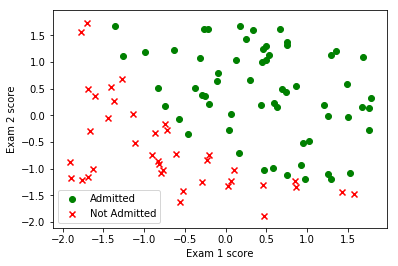

In [3]:
plt.scatter(pos[:,1],pos[:,2],marker='o',color='g',label='Admitted')
plt.scatter(neg[:,1],neg[:,2],marker='x',color='r',label='Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
def cost(theta,x,y):
    m = len(y)
    hyp = sigmoid(np.dot(x,theta)).T
    temp1 = float(np.dot(np.log(hyp),y))
    temp2 = float(np.dot(np.log(1-hyp),(1-y)))
    j = (-1/m)*(temp1+temp2)
    return j

In [9]:
def gradient(theta,x,y,alpha):
    m = len(y)
    for i in range(1000):
        h = sigmoid(np.dot(x,theta))
        h = h.reshape((h.shape[0],1))
        temp = (h-y)
        temp = np.dot(x.T,temp)
        theta=theta - (alpha/m)*temp
        J = cost(theta,x,y)
        plt.scatter(h,y)
    print(J)
    return theta
theta=(gradient(theta,x,y,0.01))
plt.show()

TypeError: only length-1 arrays can be converted to Python scalars

[-1.90552475143303, 1.7396050517295143]


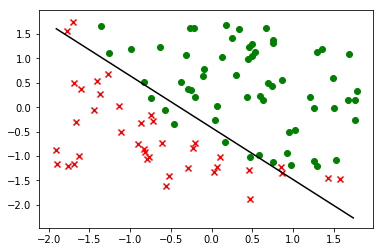

In [7]:
h = np.dot(x,theta)
plt.scatter(pos[:,1],pos[:,2],marker='o',color='g',label='Admitted')
plt.scatter(neg[:,1],neg[:,2],marker='x',color='r',label='Not Admitted')
# plt.plot(h.flatten())

plot_x = [np.min(x[:,1]), np.max(x[:,2])]
theta= theta.flatten()
plot_y = -1/theta[2]*(theta[0] + np.dot(theta[1],plot_x)) 
plt.plot(plot_x,plot_y,color='black')
print(plot_x)
plt.show()

In [8]:
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred==y)
    print(acc * 100)
accuracy(x, y.flatten(), theta, 0.5)

89.898989899
